In [2]:
#  Import necessary libraries for handling data, applying SVM, and visualizing the results
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset from the CSV file  
file_path = 'customer_purchases.csv'  
df = pd.read_csv(file_path)


# Class label 
#CustomerID: Unique identifier for each customer.
#PurchaseDate: Date of the purchase.
#ProductID: Unique identifier for each product.
#Quantity: Number of items purchased.
#UnitPrice: Price per unit of the product.
#TotalPrice: Total price (Quantity * UnitPrice).

In [6]:
# create a binary target column, HighSpender, that labels a customer as a high spender if their total purchase exceeds $150.
# Create a binary target: High spender (TotalPrice > 150)
df['HighSpender'] = (df['TotalPrice'] > 150).astype(int)

In [8]:
# Encode Categorical Variables
#The ProductID column is categorical, to convert it to numerical values using label encoding.


label_encoder = LabelEncoder()
df['ProductID_encoded'] = label_encoder.fit_transform(df['ProductID'])

In [10]:
# Select Features and Target Variable
# In this step  use class label Quantity, UnitPrice, and the encoded ProductID as features. The target will be the HighSpender column.


X = df[['Quantity', 'UnitPrice', 'ProductID_encoded']]
y = df['HighSpender']


In [12]:
# Scale the Features
# To get better performance, will  standardize the features using StandardScaler.


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
#  Split the Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)


In [22]:
# Train the SVM Model 

svm_model = SVC(kernel='linear', random_state=40)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=40)

In [26]:
# Step 9: Make predictions
y_pred = svm_model.predict(X_test)

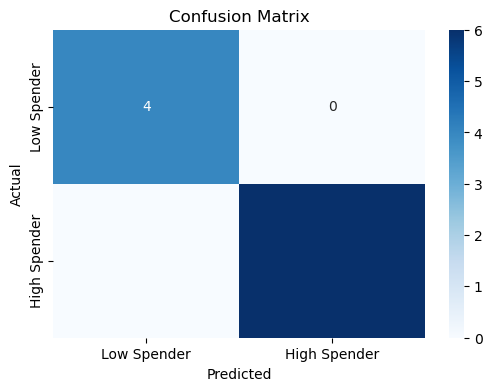

In [32]:
# evaluate the model using a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Spender', 'High Spender'], 
            yticklabels=['Low Spender', 'High Spender'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [34]:
# The classification report provides metrics : precision, recall, F1-score, and accuracy.

class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

